<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/stock_market_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Visualization

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotly
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode


# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Loading Stocks data
stocks = pd.read_csv("stocks_data_2020_till_2020_09_03.csv")
stocks.head()

In [ ]:
stocks.shape

In [ ]:
stocks.info()

In [ ]:
stocks['month'] = pd.DatetimeIndex(stocks.timestamp).month
stocks.head()

In [ ]:
def call_this_stock(df, scrip_id, month, coloumn_name='close_price'): 
    
    temp_df = stocks[(stocks.month == month) & (stocks.scrip_id == scrip_id)]
    particular_stock = temp_df[[coloumn_name, 'timestamp']]
    particular_stock = particular_stock.reset_index(drop=True, inplace=False)
    return particular_stock

stock_value = call_this_stock(stocks, 5, 5)
stock_value.head(15)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against index.')
plt.plot(stock_value.close_price);

In [ ]:
def timestamp_as_index(df):
    temp = df
    temp.set_index('timestamp', inplace=True)
    return temp

timestamp_as_index(stock_value)

In [ ]:
usv = timestamp_as_index(stock_value)
usv

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against TIMESTAMP as Index.')
plt.plot(usv);

-------------------------------------

https://www.youtube.com/watch?v=rO_cqa4x60o&t=1032s : Algorithmic Trading Strategy Using Three Moving Averages

- This program uses the **Moving Average Convergence / Divergence (MACD)** crossover to determine when to buy and sell stock.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving streaming_stocks_data.csv to streaming_stocks_data (1).csv


In [4]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']
df.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [6]:
df = df.set_index(pd.DatetimeIndex(df['timestamp'].values))
df.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [7]:
df.shape

(7497, 4)

In [18]:
df1 = df[0:374]
df1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [19]:
df1.tail()

,timestamp,last_price,volume,scrip_id
2020-08-03 15:25:00+05:30,2020-08-03 15:25:00+05:30,100.30,8885,14
2020-08-03 15:26:00+05:30,2020-08-03 15:26:00+05:30,100.35,11887,14
2020-08-03 15:27:00+05:30,2020-08-03 15:27:00+05:30,100.50,35827,14
2020-08-03 15:28:00+05:30,2020-08-03 15:28:00+05:30,100.40,17850,14
2020-08-03 15:29:00+05:30,2020-08-03 15:29:00+05:30,100.40,8589,14


In [20]:
df1.shape

(374, 4)

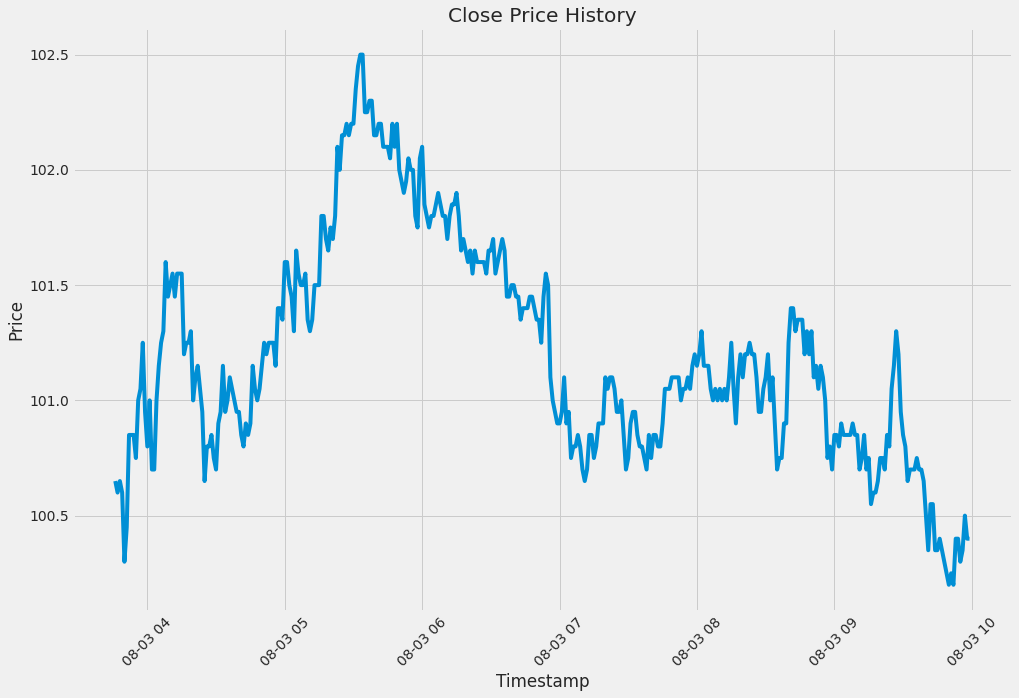

In [21]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(df1['last_price'], label='Last Price')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Calculate the three moving averages
# Calculate the short / fast exponential moving average (EMA)
ShortEMA = df1['last_price'].ewm(span=5, adjust=False).mean()

# Calculate the Middle / Medium exponential moving average (EMA)
MiddleEMA = df1['last_price'].ewm(span=21, adjust=False).mean()

# Calculate the long/slow exponential moving average (EMA)
LongEMA = df1['last_price'].ewm(span=60, adjust=False).mean()

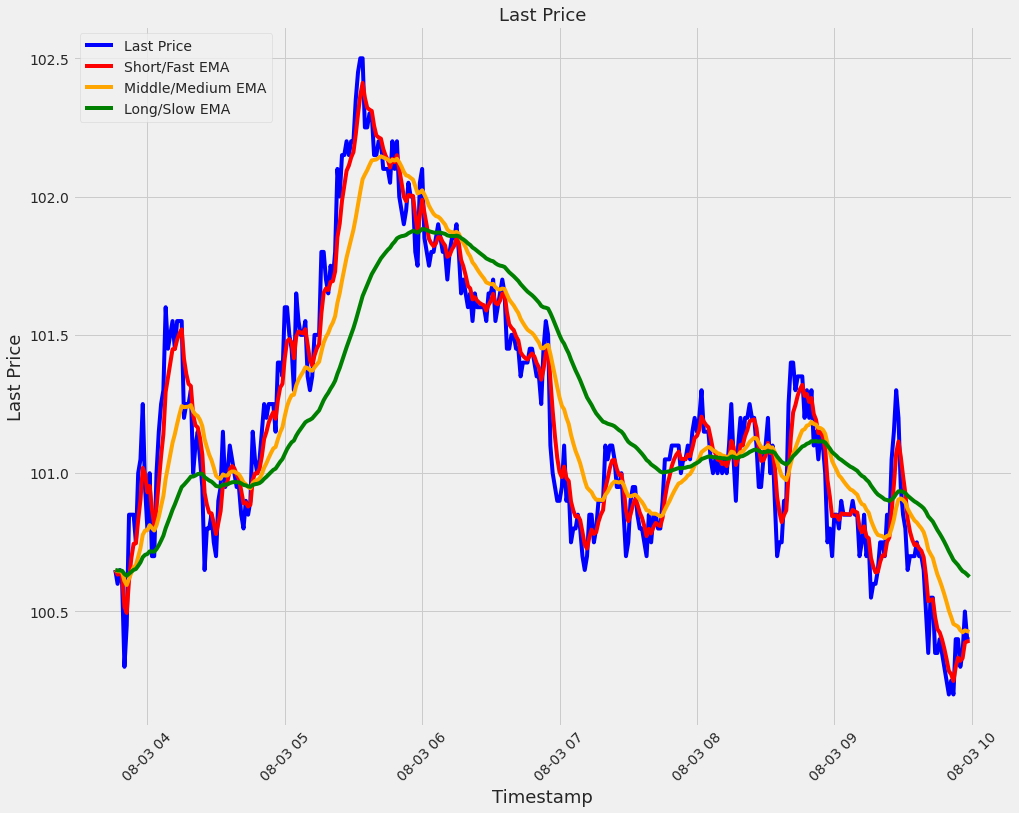

In [25]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Last Price', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', color='blue')
plt.plot(ShortEMA, label='Short/Fast EMA', color='red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label='Long/Slow EMA', color='green')
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [26]:
# Add the exponential moving averages to the dataset
df1['Short'] = ShortEMA
df1['Middle'] = MiddleEMA
df1['Long'] = LongEMA
df1.head()

,timestamp,last_price,volume,scrip_id,Short,Middle,Long
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14,100.650000,100.650000,100.650000
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14,100.633333,100.645455,100.648361
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14,100.638889,100.645868,100.648414
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14,100.625926,100.641698,100.646827
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14,100.517284,100.610635,100.635456


In [27]:
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
      
    for i in range(0, len(data)):
      if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
        buy_list.append(data['last_price'][i])
        sell_list.append(np.nan)
        flag_short = True
      elif flag_short == True and data['Short'][i] > data['Middle'][i]:
        sell_list.append(data['last_price'][i])
        buy_list.append(np.nan)
        flag_short = False
      elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
        buy_list.append(data['last_price'][i])
        sell_list.append(np.nan)
        flag_long = True
      elif flag_long == True and data['Short'][i] < data['Middle'][i]:
        sell_list.append(data['last_price'][i])
        buy_list.append(np.nan)
        flag_long = False
      else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)

    return (buy_list, sell_list)

In [28]:
# Add the buy and sell signals to the dataset
df1['Buy'] = buy_sell_function(df1)[0]
df1['Sell'] = buy_sell_function(df1)[1]

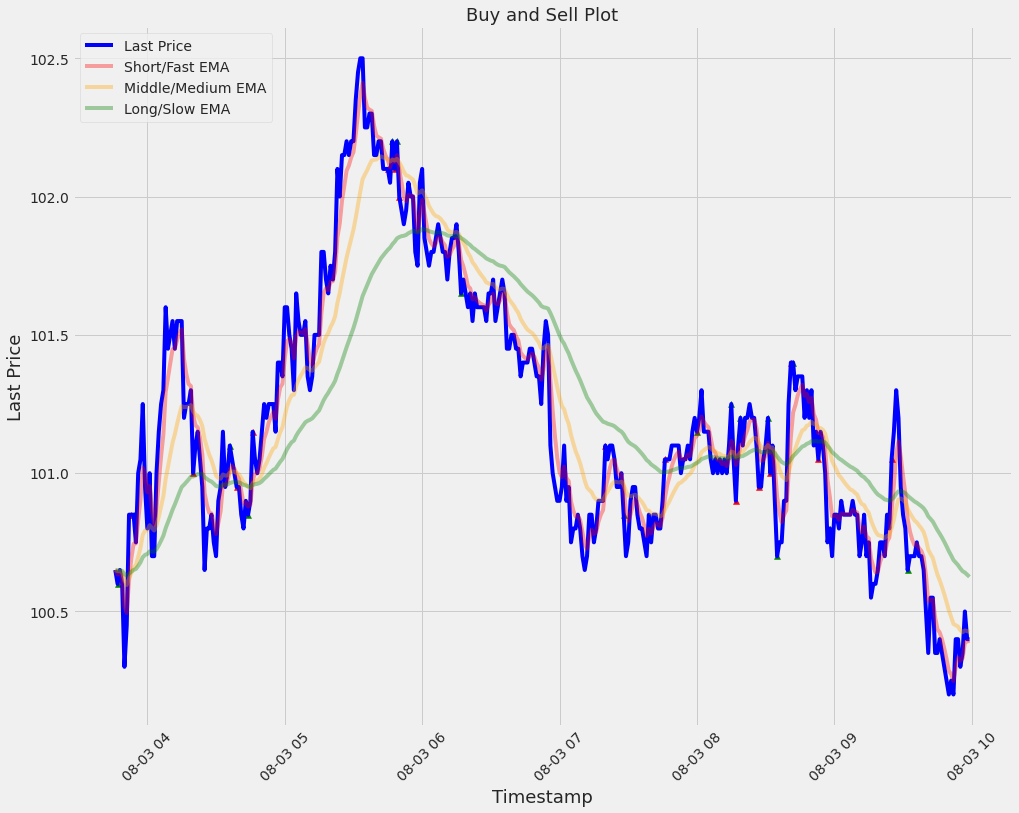

In [29]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Buy and Sell Plot', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', color='blue')
plt.plot(ShortEMA, label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(LongEMA, label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df1.index, df1['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df1.index, df1['Sell'], color='red', marker='^', alpha=1)
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()